In [1]:
#importamos librerias
import pandas as pd    # Librería para tablas y tratamiento de datos.
#Para una visualización completa de todas las columnas:
pd.set_option('display.max_columns', None)
#Accedemos a las funciones en soporte_dts de la carpeta src
from src import soporte_dts as sdts
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df_ventas_prod_client=sdts.leer_datos('csv_limpios_finales/clientes_productos_ventas_limpio.csv')
df_clientes=sdts.leer_datos('csv_iniciales/clientes.csv')
df_metricas=sdts.leer_datos('csv_limpios_finales/metricas_cliente.csv')
df_productos=sdts.leer_datos('csv_iniciales/productos.csv')

Los csv iniciales de clientes y productos, no presentan duplicados y se encuentran limpios,. Paras la informaciín que sacaremos de ellos.

## INFORMACION CLIENTES

In [3]:
#Obtenemos el numero de clientes:
print(f'Numero de clientes registrados es:{df_clientes.shape[0]}')
#Obtenemos el numero de clientes distintos que han efectuado alguna compra:


Numero de clientes registrados es:300


In [4]:
#revisamos el numero de filas:
data=[df_ventas_prod_client,df_productos,df_clientes,df_metricas]
nombre=['ventas','productos','clientes','metricas']
for i in range(0,len(nombre)):
        sdts.numero_filas(data[i],nombre[i])

Numero de filas de df ventas: 79920 filas
Numero de filas de df productos: 600 filas
Numero de filas de df clientes: 300 filas
Numero de filas de df metricas: 210 filas


In [5]:
numero_clientes_ventas=df_ventas_prod_client['id_cliente'].nunique()
print('Id_clientes distintos que han realizado alguna transacción:', numero_clientes_ventas)

Id_clientes distintos que han realizado alguna transacción: 210


## ACTIVIDAD CLIENTES

In [15]:
print(f'Porcentaje de clientes registrados que han realizado alguna compra o transacción es de {numero_clientes_ventas/df_clientes.shape[0]*100} %')

Porcentaje de clientes registrados que han realizado alguna compra o transacción es de 70.0 %


In [25]:
#Creamos un df que indique si un cliente s activo( ha realizado alguna compra o no)
df_actividad_clientes=df_metricas.merge(right=df_clientes, how='right',on='id_cliente')
df_actividad_clientes['actividad']=df_actividad_clientes['primera_compra'].apply(lambda x: 'No' if pd.isna(x) else 'yes')

In [26]:
df_actividad_clientes.sample(10)

,Unnamed: 0,id_cliente,primera_compra,ultima_compra,numero_compras,valor_total,dia_primera_compra,mes_primera_compra,año_primera_compra,dia_ultima_compra,mes_ultima_compra,año_ultima_compra,antiguedad_dias,actividad_dias,actividad_meses,actividad_años,compras_por_mes,compras_por_año,nombre,apellido,ciudad,actividad
156,NaN,C0157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sofía,López,"Marsella, Francia",No
7,NaN,C0008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Marta,López,"Sevilla, España",No
207,143.0,C0208,2020-02-20,2024-04-17,26.0,62041.40,20.0,2.0,2020.0,17.0,4.0,2024.0,1791.0,1518.0,51.0,4.0,0.509804,6.50,Elena,Fernández,"París, Francia",yes
299,209.0,C0300,2020-01-08,2024-05-09,40.0,111634.97,8.0,1.0,2020.0,9.0,5.0,2024.0,1834.0,1583.0,53.0,4.0,0.754717,10.00,Carmen,Pérez,"Aveiro, Portugal",yes
208,144.0,C0209,2020-01-03,2024-03-11,32.0,88755.49,3.0,1.0,2020.0,11.0,3.0,2024.0,1839.0,1529.0,51.0,4.0,0.627451,8.00,Laura,Fernández,"Barcelona, España",yes
169,NaN,C0170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Elena,Martínez,"Oporto, Portugal",No
269,192.0,C0270,2020-01-12,2024-02-28,40.0,103554.14,12.0,1.0,2020.0,28.0,2.0,2024.0,1830.0,1508.0,50.0,4.0,0.800000,10.00,Laura,Fernández,"Toulouse, Francia",yes
238,NaN,C0239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laura,Gómez,"Zaragoza, España",No
151,103.0,C0152,2020-02-11,2024-05-27,35.0,86949.16,11.0,2.0,2020.0,27.0,5.0,2024.0,1800.0,1567.0,52.0,4.0,0.673077,8.75,Laura,Rodríguez,"Marsella, Francia",yes
13,NaN,C0014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,María,López,"Aveiro, Portugal",No


In [27]:
df_actividad_agrupado=df_actividad_clientes.groupby('actividad')['id_cliente'].count().reset_index()

In [28]:
df_actividad_agrupado

,actividad,id_cliente
0,No,90
1,yes,210


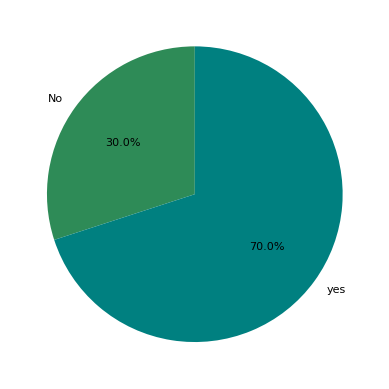

In [20]:
colores=["seagreen","teal"]
plt.pie('id_cliente', labels='actividad',
        data=df_actividad_agrupado,
        autopct='%1.1f%%',
        colors=colores,
        textprops={'fontsize':8},
        startangle=90);

El 30% de los clientes registrados no ha relizado ninguna compra.
Sacamos aquellos registros de clientes que no han realizado compra para acciones de MKT:
-¿Por qué no han realizado ninguna compra?

In [29]:
clientes_sin_actividad=df_actividad_clientes[df_actividad_clientes['actividad']== 'No']
clientes_no_activos=list(clientes_sin_actividad['id_cliente'].unique())

In [30]:
df_clientes_no_activos=df_clientes[df_clientes['id_cliente'].isin(clientes_no_activos)]
df_clientes_no_activos

,id_cliente,nombre,apellido,ciudad
5,C0006,Elena,López,"Braga, Portugal"
7,C0008,Marta,López,"Sevilla, España"
9,C0010,Carmen,López,"Granada, España"
11,C0012,Sofía,González,"Barcelona, España"
12,C0013,María,Gómez,"Lyon, Francia"
...,...,...,...,...
289,C0290,María,García,"Oporto, Portugal"
291,C0292,Carmen,Sánchez,"Braga, Portugal"
292,C0293,Julia,López,"Sevilla, España"
295,C0296,Elena,Rodríguez,"Sevilla, España"


In [31]:
df_clientes_no_activos.to_csv("csv_limpios_finales/clientes_no_activos.csv", index=False)

## Procedencia de los clientes:
Estudiamos la procedencia de los clientes y su actividas. En qué país son activos.

In [32]:
df_actividad_clientes[['ciudad','pais']]=df_actividad_clientes['ciudad'].str.split(', ', expand=True)

In [34]:
df_actividad_clientes.sample(5)

,Unnamed: 0,id_cliente,primera_compra,ultima_compra,numero_compras,valor_total,dia_primera_compra,mes_primera_compra,año_primera_compra,dia_ultima_compra,mes_ultima_compra,año_ultima_compra,antiguedad_dias,actividad_dias,actividad_meses,actividad_años,compras_por_mes,compras_por_año,nombre,apellido,ciudad,actividad,pais
64,46.0,C0065,2020-05-02,2024-06-24,49.0,142385.26,2.0,5.0,2020.0,24.0,6.0,2024.0,1719.0,1514.0,50.0,4.0,0.980000,12.25,María,Hernández,París,yes,Francia
232,NaN,C0233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ana,González,Toulouse,No,Francia
206,NaN,C0207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clara,Hernández,Valencia,No,España
282,201.0,C0283,2020-02-05,2024-05-22,42.0,106640.21,5.0,2.0,2020.0,22.0,5.0,2024.0,1806.0,1568.0,52.0,4.0,0.807692,10.50,Sofía,García,Málaga,yes,España
195,NaN,C0196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Julia,Fernández,Madrid,No,España


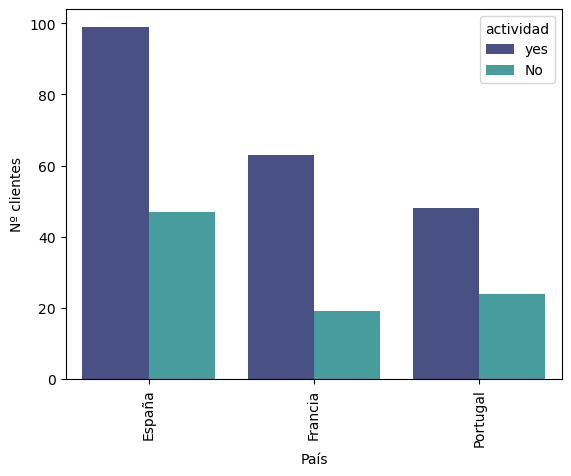

In [36]:
sns.countplot(x='pais',
            data= df_actividad_clientes,
            palette="mako",
            hue= "actividad")
plt.xticks(rotation = 90)
plt.xlabel("País")
plt.ylabel("Nº clientes"); 

In [50]:
df_activida_pais=df_actividad_clientes.groupby(['pais'], as_index=False).agg({'id_cliente':'nunique'})

In [51]:
df_activida_pais

,pais,id_cliente
0,España,146
1,Francia,82
2,Portugal,72
